# Introduction
This notebook tries to mimic the operation condition.
One should control the position of the motors and optics through the manipulation of the corresponding motion axes through the pre-defined functions.
In this way, one moves within the range permitted by the motor and respect the geometric constrain of the installation of the setup.

Initially, I thought I could move the installation operation to this notebook.
However, it seems that that is not very possible simply due to the complexity of the module.

#### Definition
1. um, fs, keV
2. normal is pointing inwards the reflection surface
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z)
    i.e., The name in this code is x,y,z, using one convension. In the text, use the XPP convention 

np.fft(field) = spectrum

np.ifft(spectrum) = field

#### Color code
red: pump beam, cc beam
green: probe beam, vcc beam

# Step 1: Ray Tracing Calculation

In [1]:
import time
import sys
sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

# Level 1 dependence
from XRaySimulation import Pulse, DeviceSimu, util

# Level 2 dependece
import parser
import Controller

plt.rcParams.update({'font.size': 12})

In [2]:
# Create the experiment setup
exp = Controller.XppController_TG()

Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, ro

# Define functions on the fly

In [3]:
def move_vcc_zero():
    _ = exp.t2.x_umv(0)
    _ = exp.t3.x_umv(0)
    
def move_vcc(x):
    _ = exp.t2.x_umvr(x)
    _ = exp.t3.x_umvr(-x)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = exp.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = exp.sample.x_umv(22804.9636)
    
def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = exp.sample.z_umv(0)
    print("Move sample.x")
    _ = exp.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment():
    pass

def optimize_CC_VCC_overlap():
    pass

# Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89067 degree
Motor moved from -17.88927 to -17.89097 degree


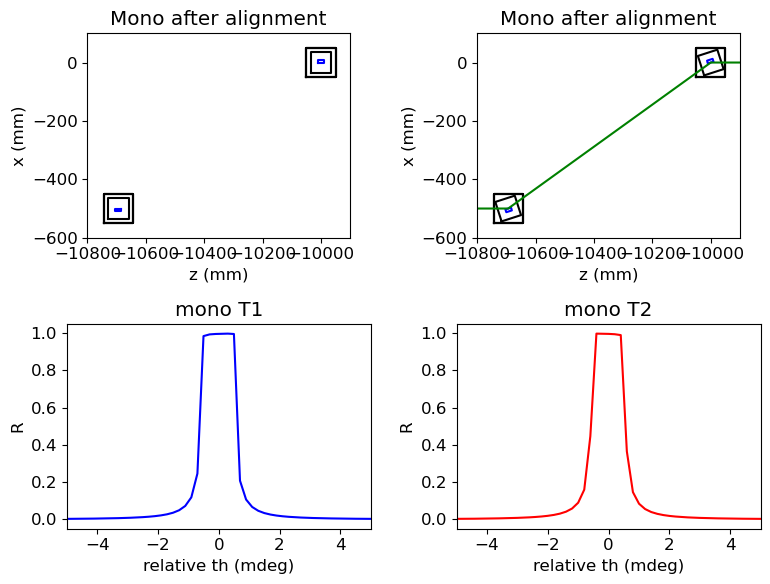

In [4]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
exp.plot_mono_optics(ax=ax[0,0])

# show mono after alignment
_ = exp.align_xpp_mono()
exp.plot_mono_optics(ax=ax[0,1], show_trajectory=True)
exp.plot_mono_rocking(ax_mono_t1=ax[1,0], ax_mono_t2=ax[1,1])

plt.tight_layout()
plt.show()

# Preparation: Align the miniSD

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to -19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to -19.23525 degree
Motor moved from 0.00000 to -19.23525 degree
Motor moved from 19.23525 to 19.23583 degree
Motor moved from -19.23525 to -19.23643 degree
Motor moved from -19.23525 to -19.23624 degree
Motor moved from 19.23525 to 19.23673 degree
Motor moved from 19.23525 to 19.23677 degree
Motor moved from -19.23525 to -19.23612 degree


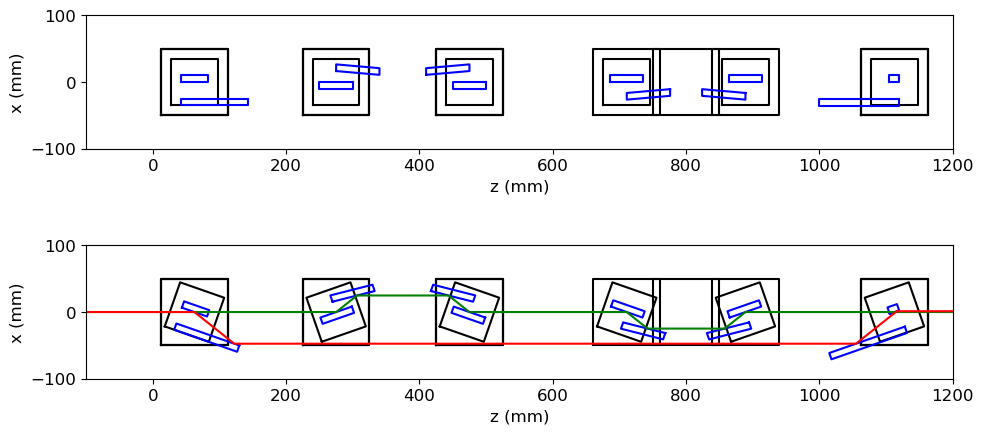

In [5]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
exp.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = exp.align_miniSD()
exp.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Get the most updated rocking curve around current location.


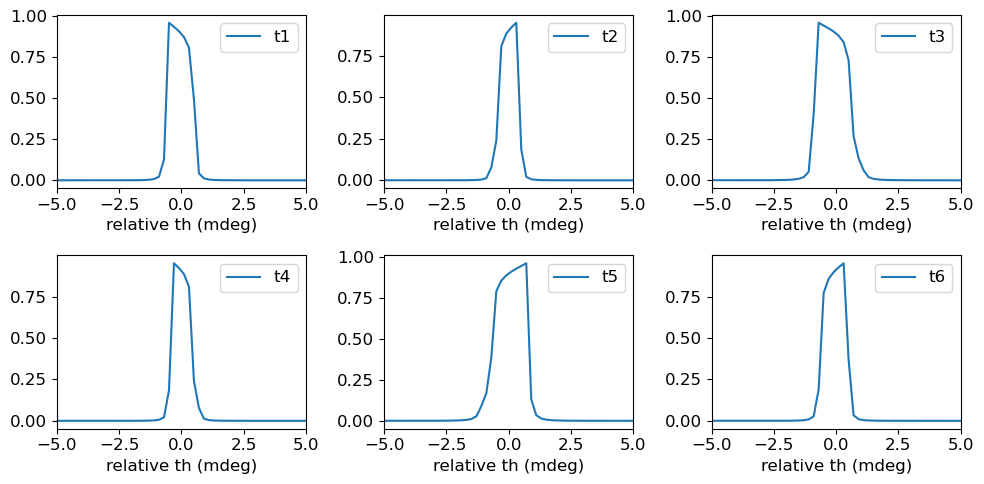

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

exp.plot_miniSD_rocking(ax_list = np.reshape(ax, 6))

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

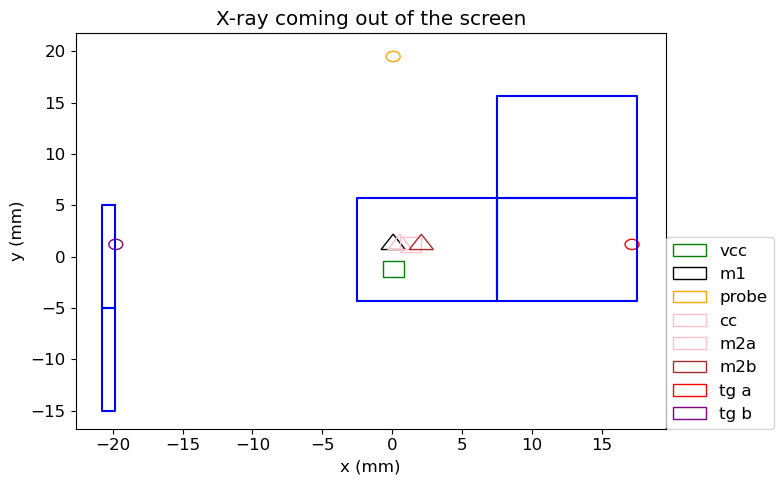

In [7]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

exp.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [8]:
# Assume that we have calibrated the incident angle
_ = exp.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = exp.get_raytracing_trajectory(path="probe m1 only")
_ = exp.m1.y_umvr(100)
path_new = exp.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = exp.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = exp.m1.y_umvr(total_diff / coef * 100)

Motor moved from 0.00000 to 0.10000 degree
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse -53256.31592 um in y axis by moving m1y 100 um
Need to move m1y -850.77953 um to compensate the total difference of 453093.83238 um
Motor moved from 100.0000 um to to -750.7795 um


Perform ray tracing calculation at current motor position.


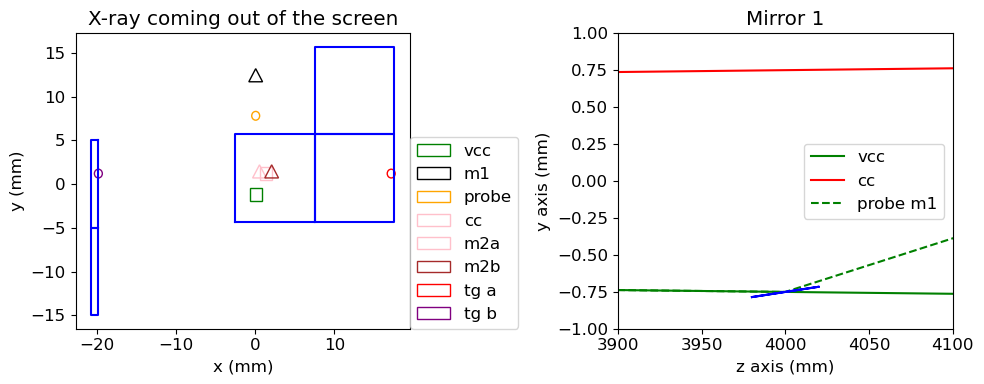

In [9]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0])
exp.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

Perform ray tracing calculation at current motor position.


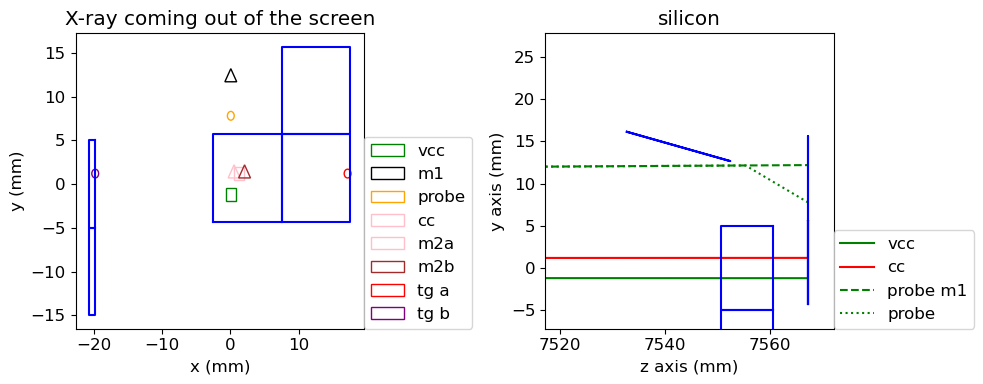

In [10]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0])
exp.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align Bragg angle

In [11]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / exp.gaussian_pulse.klen0, plane_distance=Controller.si111['d'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = exp.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = DeviceSimu.get_rocking_curve_around_axis(
                                kin=exp.gaussian_pulse.k0,
                                scan_range=np.deg2rad(0.5),
                                scan_number=10 ** 4,
                                rotation_axis=exp.si.pi.rotation_axis,
                                h_initial=exp.si.optics.h,
                                normal_initial=exp.si.optics.normal,
                                thickness=exp.si.optics.thickness,
                                chi_dict=exp.si.optics.chi_dict, )

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = exp.si.pi_umv(target= exp.si.pi.control_location + angle_adjust)

Motor moved from 0.00000 to 1.63904 degree
Motor moved from 1.63904 to 1.63920 degree


Perform ray tracing calculation at current motor position.


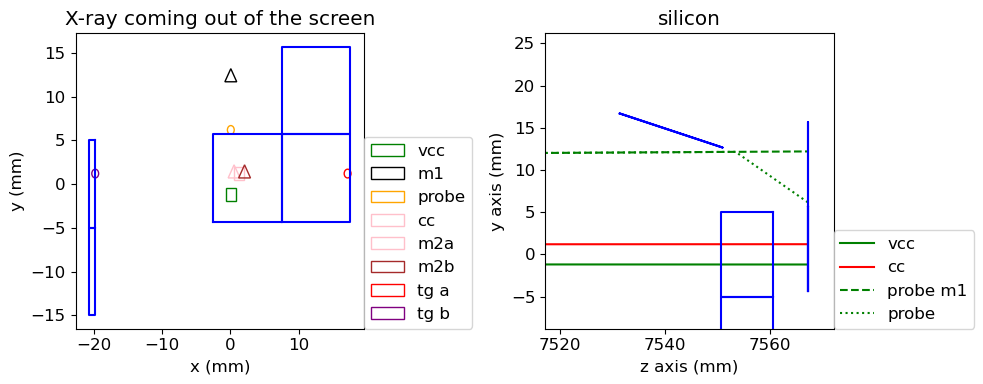

In [12]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0])
exp.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align silicon position and overlap

In [13]:
# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = exp.get_raytracing_trajectory(path="probe")
_ = exp.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = exp.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = exp.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100, total_diff))
_ = exp.si.y_umvr(total_diff / coef * 100)

# Move the si111 crystal along the x axis
x_offset = probe_new_traj[-1][1] - exp.si.optics.surface_point[1]
exp.si.x_umvr(x_offset)

Motor moved from 0.0000 um to to 100.0000 um
Move the probe pulse 209.13875 um in y axis by moving siy 100 um
Need to move siy -2484.17065 um to compensate the total difference of -5195.36348 um
Motor moved from 100.0000 um to to -2384.1707 um
Motor moved from 0.0000 um to to 64.5140 um


Perform ray tracing calculation at current motor position.


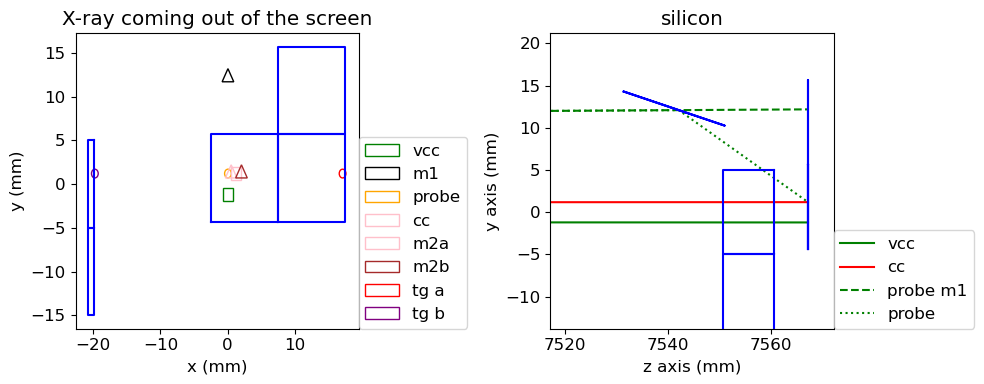

In [14]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0])
exp.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [15]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = exp.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_2 = exp.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_3 = exp.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
The different between probe beam and cc on the yag is
[    2.67411917 -1246.93834457     0.        ]
Motor moved from 0.0000 um to to 100.0000 um
Motor moved from 0.0000 um to to -100.0000 um
The different between probe beam and cc on the yag is
[    2.6715367  -1113.17128019     0.        ]
The relative beam positions between the probe and cc beam changes
[-2.58247285e-03  1.33767064e+02  0.00000000e+00]
by changing the t2x and t3x by 100 um
The current total difference is [  -2.6715367  1113.17128019    0.        ]
Needs to move 832.1714208125572um to elimiate the horizontal difference
Motor moved from 100.0000 um to to 932.1714 um
Motor moved from -100.0000 um to to -932.1714 um
After adjusting, the different between probe beam and cc on the yag is
[-2.65003244 -0.7105223   0.        ]


# Step 3: Align the total reflection mirrors for the pump pulse

In [16]:
_ = exp.m2a.yaw_umv(np.deg2rad(0.3))
_ = exp.m2a.x_umv(-8e3)

_ = exp.m2b.yaw_umv(np.deg2rad(-0.3))
_ = exp.m2b.x_umv(11e3)

Motor moved from 0.00000 to 0.30000 degree
Motor moved from 0.0000 um to to -8000.0000 um
Motor moved from 0.00000 to -0.30000 degree
Motor moved from 0.0000 um to to 11000.0000 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


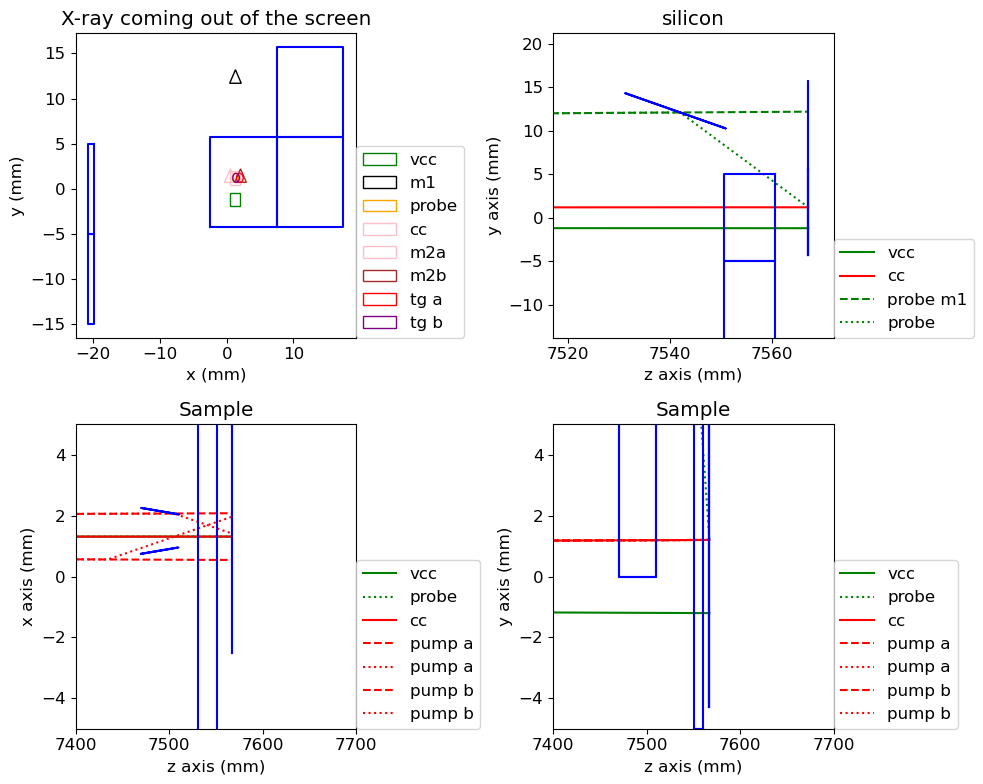

In [17]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0,0])
exp.plot_si_traj(ax=ax[0,1], axis='yz')
exp.plot_tg_traj(ax=ax[1,0], axis='xz')
exp.plot_tg_traj(ax=ax[1,1], axis='yz')

plt.tight_layout()
plt.show()

In [18]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = exp.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = exp.get_raytracing_trajectory(path='pump a')
_ = exp.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = exp.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100, 
                                                                                            total_diff))
_ = exp.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = exp.get_raytracing_trajectory(path='pump b')
_ = exp.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = exp.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100, 
                                                                                            total_diff))
_ = exp.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from -8000.0000 um to to -7900.0000 um
Move the TG-a pulse 200.19105 um in x axis by moving m2a_x 100 um
Need to move m2a_x -426.11614 um to compensate the total difference of -853.04639 um
Motor moved from -7900.0000 um to to -8326.1161 um

 
Get trajectory b
Motor moved from 11000.0000 um to to 11100.0000 um
Move the TG-a pulse 200.08705 um in x axis by moving m2a_x 100 um
Need to move m2a_x -150.35603 um to compensate the total difference of -300.84295 um
Motor moved from 11100.0000 um to to 10949.6440 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


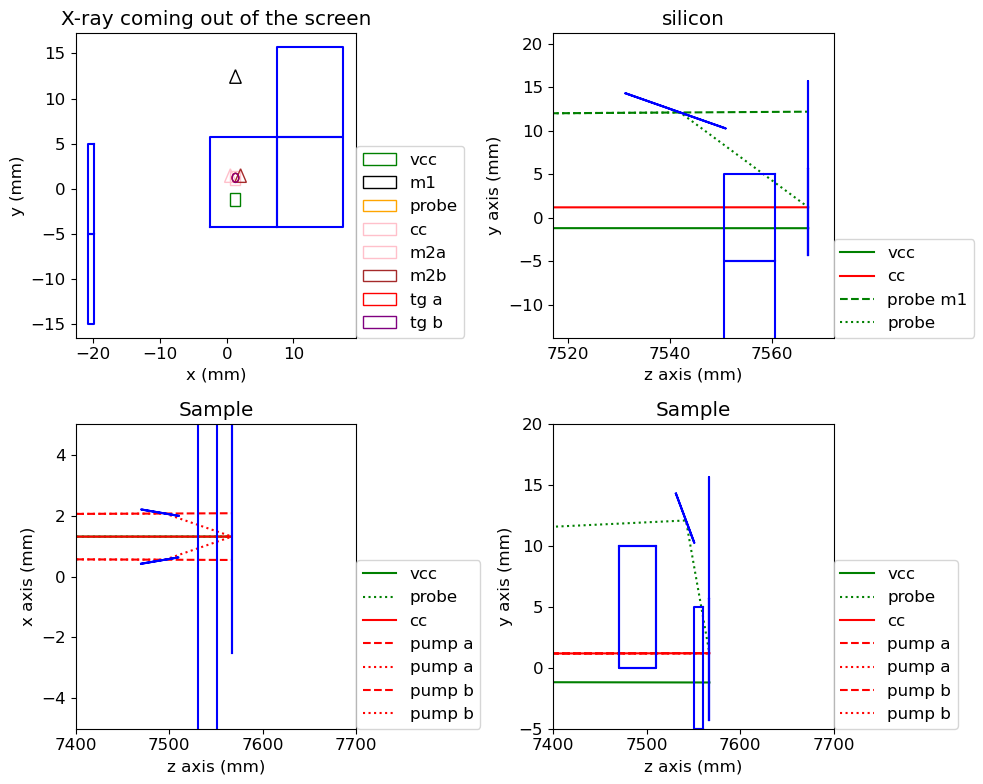

In [19]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

exp.plot_beam_on_yag(ax=ax[0,0])
exp.plot_si_traj(ax=ax[0,1], axis='yz')
exp.plot_tg_traj(ax=ax[1,0], axis='xz')
exp.plot_tg_traj(ax=ax[1,1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [21]:
pathLenght = exp.get_arrival_time()

In [22]:
print((pathLenght['pump a'] - pathLenght['pump b'])/util.c)
print((pathLenght['pump a'] - pathLenght['probe'])/util.c)

0.0005030386783857491
-8285.607418324682


# Step 4: Find the X-ray beam on the sample YAG screen

In [23]:
# Step 1: Move the sample to the location of the YAG
move_sample()

Move sample tower to sample
Move sample.z
Motor moved from 0.0000 um to to 11565.5671 um
Move sample.x
Motor moved from 0.0000 um to to 22804.9636 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


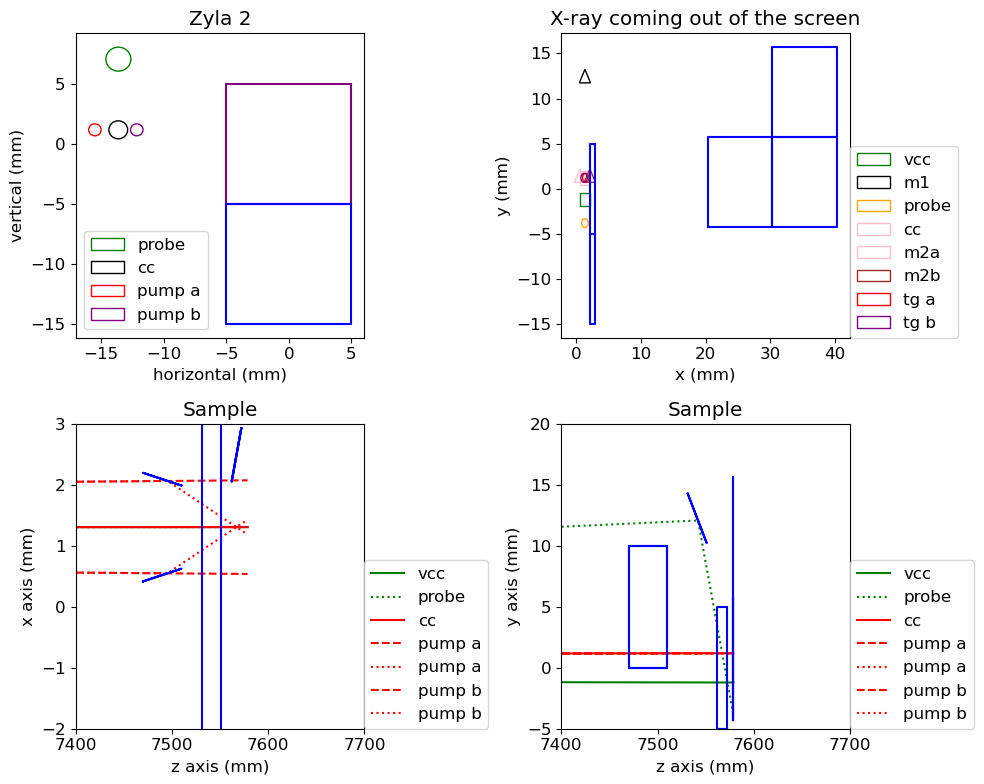

In [24]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

exp.plot_beam_on_sample_yag(ax=axes[0, 0])
exp.plot_beam_on_yag(ax=axes[0, 1])
exp.plot_tg_traj(ax=axes[1,0], ylim=[-2, 3], axis='xz')
exp.plot_tg_traj(ax=axes[1,1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [25]:
# Check the spatial separation of the probe and pump
beam_path_sample = exp.get_beam_position_on_sample_yag()

In [26]:
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.89765938e+03, 7.26396044e-01, 8.30274478e+00])

# Step 5: Refine the spatial overlap

In [27]:
exp.sample.x_umvr(-1)

Motor moved from 22804.9636 um to to 22803.9636 um


In [28]:
exp.sample.x_umvr(-1)

Motor moved from 22803.9636 um to to 22802.9636 um


In [29]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.88368228e+03, 7.26358500e-01, 8.30231564e+00])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


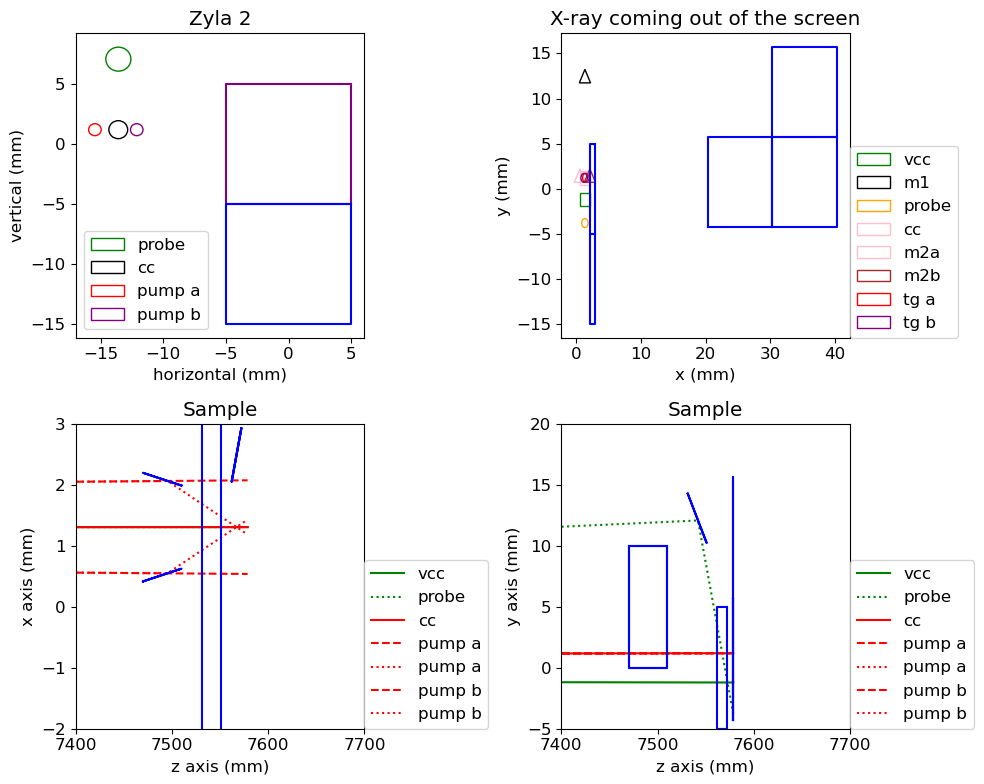

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

exp.plot_beam_on_sample_yag(ax=axes[0, 0])
exp.plot_beam_on_yag(ax=axes[0, 1])
exp.plot_tg_traj(ax=axes[1,0], ylim=[-2, 3], axis='xz')
exp.plot_tg_traj(ax=axes[1,1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

In [31]:
exp.sample.z_umvr(-1)

Motor moved from 11565.5671 um to to 11564.5671 um


In [32]:
exp.sample.z_umv(11565.5671)

Motor moved from 11564.5671 um to to 11565.5671 um


201000000000.0

In [33]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([5.88367477e+03, 7.26358480e-01, 8.30231541e+00])

### It seems that by ajusting the position of the sample stage motors, one cannot achieve good quality overlap

In [34]:
exp.sample.z_umv(11565.5671)
exp.sample.x_umv(21650.9636)

Motor moved from 11565.5671 um to to 11565.5671 um
Motor moved from 22802.9636 um to to 21650.9636 um


-576000000000.0

In [35]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([163.08416881,   0.71099208,   8.12667669])

In [36]:
exp.si.y_umvr(-1)

Motor moved from -2384.1707 um to to -2385.1707 um


In [37]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([160.9084317 ,   0.71099357,   8.12669369])

In [38]:
exp.si.roll.user_get_position()

0.0

In [39]:
exp.si.roll.control_limits

array([-0.08726646,  0.08726646])

In [40]:
exp.si.roll_umv(np.deg2rad(0.0))

Motor moved from 0.00000 to 0.00000 degree


0.0

In [41]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([159.9906397 ,   0.90518276,  10.34628629])

In [42]:
exp.sample.x_umvr(1)

Motor moved from 21650.9636 um to to 21651.9636 um


In [43]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['probe'] - beam_path_sample['cc']

array([161.27818766,   0.90516295,  10.34605988])

Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


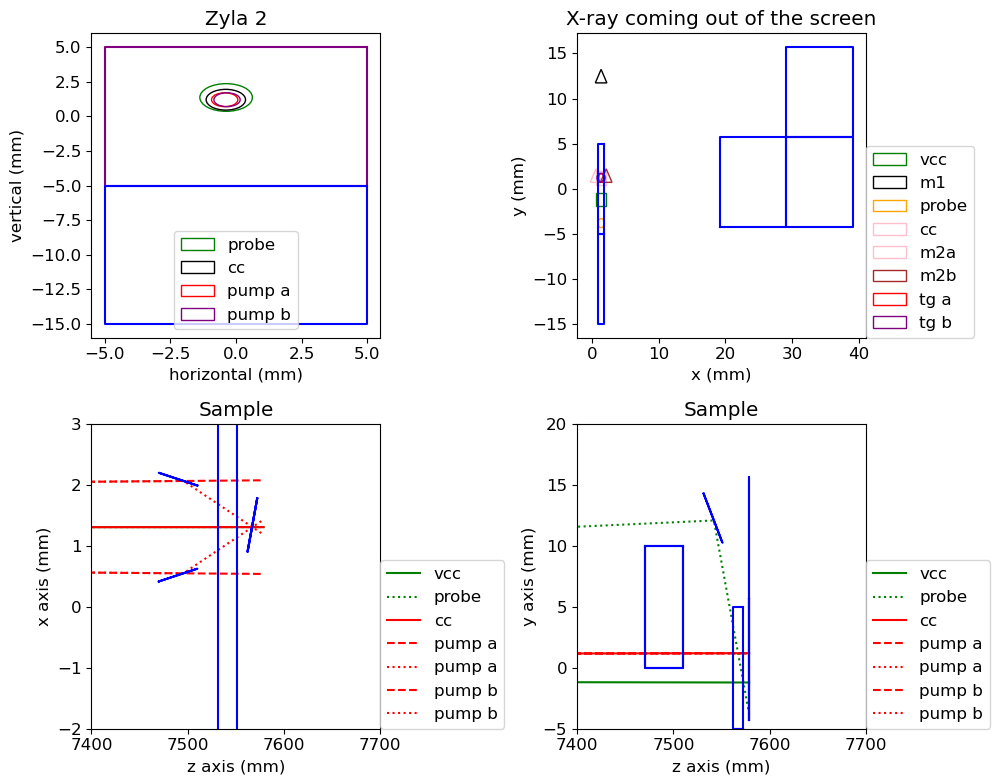

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=2)

fig.set_figheight(8)
fig.set_figwidth(10)

exp.plot_beam_on_sample_yag(ax=axes[0, 0])
exp.plot_beam_on_yag(ax=axes[0, 1])
exp.plot_tg_traj(ax=axes[1,0], ylim=[-2, 3], axis='xz')
exp.plot_tg_traj(ax=axes[1,1], ylim=[-5, 20], axis='yz')

plt.tight_layout()
plt.show()

# Step 6: Find the delay time

In [47]:
pathLenght = exp.get_arrival_time()

In [48]:
print((pathLenght['pump a'] - pathLenght['pump b'])/util.c)
print((pathLenght['pump a'] - pathLenght['probe'])/util.c)

-0.003031627547200514
-11769.803639900487


# Step 7: Calculate the Ewarld sphere and Q space coverage during rotation

In [ ]:
10 / np.arcsin(np.deg2rad(5))

In [ ]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['pump b']

In [ ]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['pump a'] - beam_path_sample['cc']

In [ ]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
beam_path_sample['pump b'] - beam_path_sample['cc']

In [ ]:
exp.m2a.x_umvr(-1)

In [ ]:
exp.m2a.x_umvr(1)

In [ ]:
beam_path_sample = exp.get_beam_position_on_sample_yag()
print(beam_path_sample['pump a'] - beam_path_sample['cc'])
print(beam_path_sample['pump b'] - beam_path_sample['cc'])

In [ ]:
pathLenght = exp.get_path_length()
print((pathLenght['pump a'] - pathLenght['pump b'])/util.c)
print((pathLenght['pump a'] - pathLenght['probe'])/util.c / 1000)

In [ ]:
(beam_path_sample['pump a'] - beam_path_sample['pump b']) / util.c

In [ ]:
1/np.tan(np.deg2rad(5)) / util.c